# Tom Dooney, 6230256 - Lab 4 Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from pandas import DataFrame
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import mean_squared_error
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Assignment 1 (a)

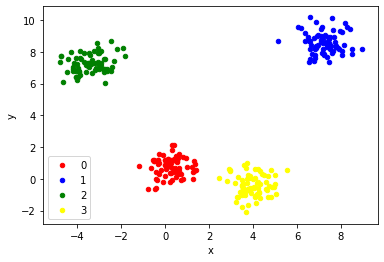

In [2]:
X, y = make_blobs(n_samples=300, centers=4, n_features=2, cluster_std=0.6)


df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green', 3:'yellow'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

## (b), (c)

Contigency Matrix for k-Means with 1 Clusters:
[[75]
 [75]
 [75]
 [75]]
Mean-Squared error:
3.5


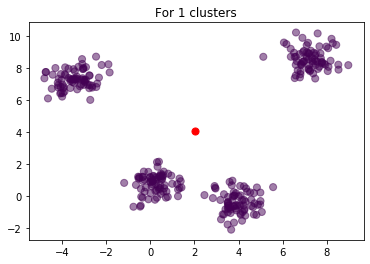

Contigency Matrix for k-Means with 2 Clusters:
[[ 0 75]
 [75  0]
 [ 0 75]
 [ 0 75]]
Mean-Squared error:
1.75


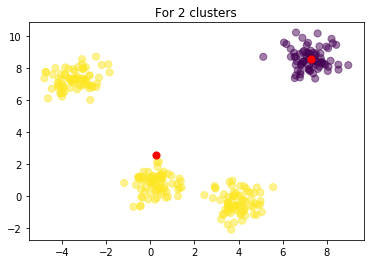

Contigency Matrix for k-Means with 3 Clusters:
[[75  0  0]
 [ 0  0 75]
 [ 0 75  0]
 [75  0  0]]
Mean-Squared error:
2.75


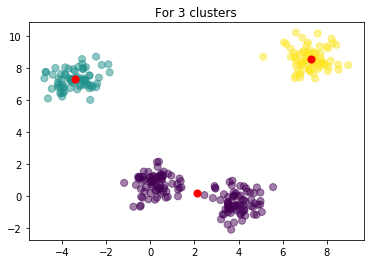

Contigency Matrix for k-Means with 4 Clusters:
[[75  0  0  0]
 [ 0  0 75  0]
 [ 0 75  0  0]
 [ 0  0  0 75]]
Mean-Squared error:
0.5


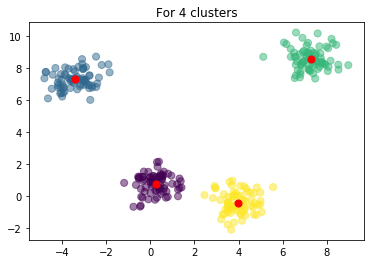

Contigency Matrix for k-Means with 5 Clusters:
[[ 0  0  0 75  0]
 [ 0 75  0  0  0]
 [ 0  0 36  0 39]
 [75  0  0  0  0]]
Mean-Squared error:
5.02


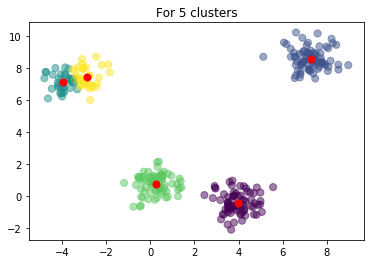

Contigency Matrix for k-Means with 6 Clusters:
[[ 0  0  0 75  0  0]
 [ 0  0 75  0  0  0]
 [ 0 36  0  0  0 39]
 [33  0  0  0 42  0]]
Mean-Squared error:
4.92


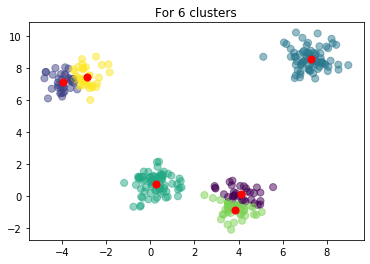

Contigency Matrix for k-Means with 7 Clusters:
[[ 0  0  0 75  0  0  0]
 [ 0  0 43  0  0  0 32]
 [ 0 36  0  0 39  0  0]
 [33  0  0  0  0 42  0]]
Mean-Squared error:
7.25


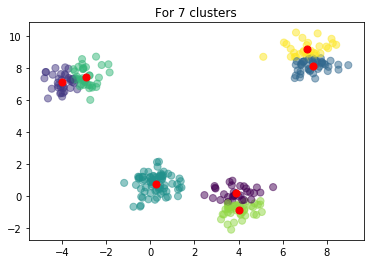

Contigency Matrix for k-Means with 8 Clusters:
[[33  0  0  0 42  0  0  0]
 [ 0  0 43  0  0  0  0 32]
 [ 0 39  0  0  0  0 36  0]
 [ 0  0  0 33  0 42  0  0]]
Mean-Squared error:
8.833


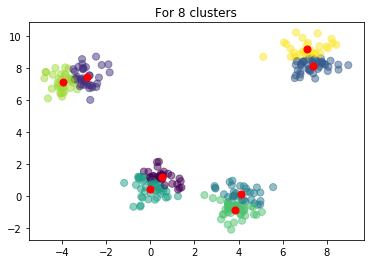

Contigency Matrix for k-Means with 9 Clusters:
[[40  0  0  0 14  0  0  0 21]
 [ 0  0 43  0  0  0  0 32  0]
 [ 0 39  0  0  0  0 36  0  0]
 [ 0  0  0 33  0 42  0  0  0]]
Mean-Squared error:
11.82


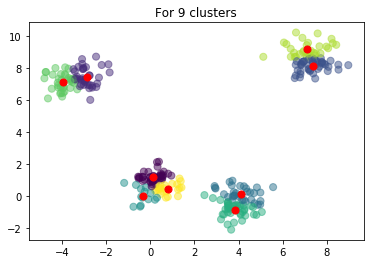

Contigency Matrix for k-Means with 10 Clusters:
[[40  0  0  0 14  0  0  0 21  0]
 [ 0  0 43  0  0  0  0 32  0  0]
 [ 0 39  0  0  0  0 36  0  0  0]
 [ 0  0  0 20  0 33  0  0  0 22]]
Mean-Squared error:
14.34


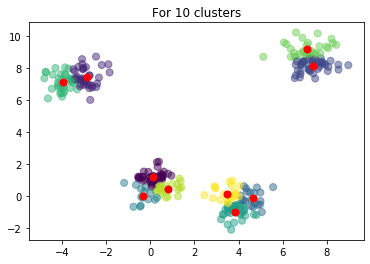

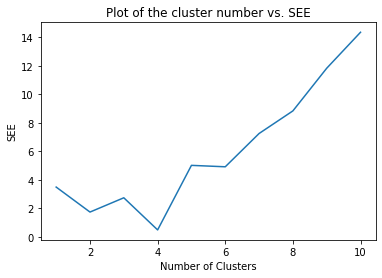

In [5]:
k = [1,2,3,4,5,6,7,8,9,10]
SSE_iter=[]
for i in k:
    kmeans = KMeans(n_clusters = i)
    y_pred = kmeans.fit_predict(df)
    centroids = kmeans.cluster_centers_
    print('Contigency Matrix for k-Means with '+str(i)+' Clusters:')
    print(contingency_matrix(y,y_pred))
    print('Mean-Squared error:')
    SSE = mean_squared_error(y,y_pred)
    print(round(SSE,3))
    SSE_iter.append(SSE)      
    plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.title('For ' +str(i)+ ' clusters')
    plt.show()

plt.plot(k,SSE_iter)
plt.title('Plot of the cluster number vs. SEE')
plt.xlabel('Number of Clusters')
plt.ylabel('SEE')
plt.show()
plt.show()

 ## (C) 
 Sum Squared Error is lowest for 4, meaning that this is the natural number of clusters

## (d)

Standard Deviation = 0.1


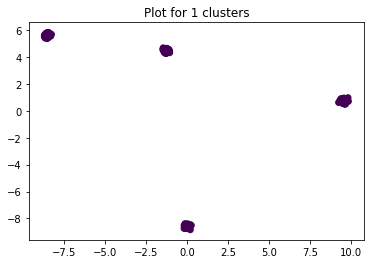

Contigency Matrix for 1 Clusters:
[[75]
 [75]
 [75]
 [75]]
SSE = 3.5


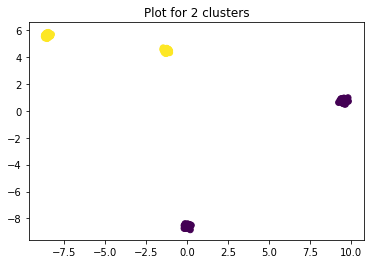

Contigency Matrix for 2 Clusters:
[[ 0 75]
 [ 0 75]
 [75  0]
 [75  0]]
SSE = 3.5


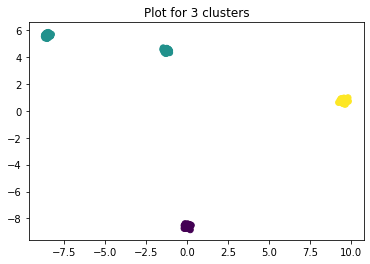

Contigency Matrix for 3 Clusters:
[[ 0 75  0]
 [ 0 75  0]
 [ 0  0 75]
 [75  0  0]]
SSE = 2.5


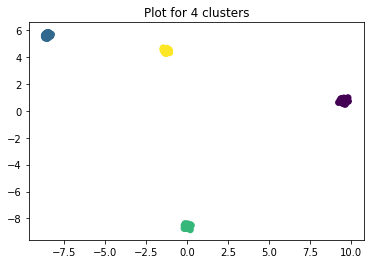

Contigency Matrix for 4 Clusters:
[[ 0 75  0  0]
 [ 0  0  0 75]
 [75  0  0  0]
 [ 0  0 75  0]]
SSE = 2.5


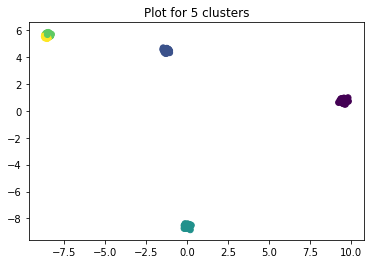

Contigency Matrix for 5 Clusters:
[[ 0  0  0 35 40]
 [ 0 75  0  0  0]
 [75  0  0  0  0]
 [ 0  0 75  0  0]]
SSE = 4.433333333333334


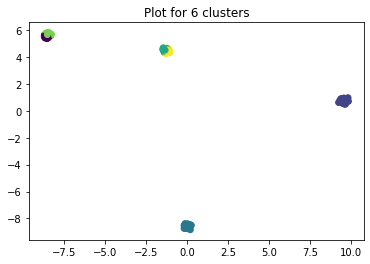

Contigency Matrix for 6 Clusters:
[[40  0  0  0 35  0]
 [ 0  0  0 44  0 31]
 [ 0 75  0  0  0  0]
 [ 0  0 75  0  0  0]]
SSE = 4.6066666666666665


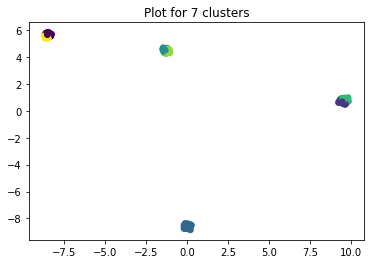

Contigency Matrix for 7 Clusters:
[[39  0  0  0  0  0 36]
 [ 0  0  0 43  0 32  0]
 [ 0 32  0  0 43  0  0]
 [ 0  0 75  0  0  0  0]]
SSE = 7.53


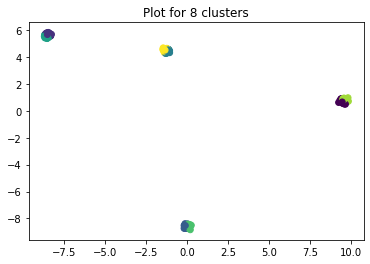

Contigency Matrix for 8 Clusters:
[[ 0 35  0  0 40  0  0  0]
 [ 0  0  0 31  0  0  0 44]
 [40  0  0  0  0  0 35  0]
 [ 0  0 36  0  0 39  0  0]]
SSE = 10.983333333333333


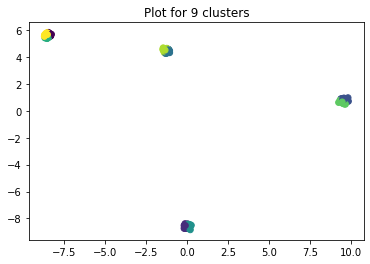

Contigency Matrix for 9 Clusters:
[[23  0  0  0  0 28  0  0 24]
 [ 0  0  0 32  0  0  0 43  0]
 [ 0  0 43  0  0  0 32  0  0]
 [ 0 36  0  0 39  0  0  0  0]]
SSE = 15.356666666666667


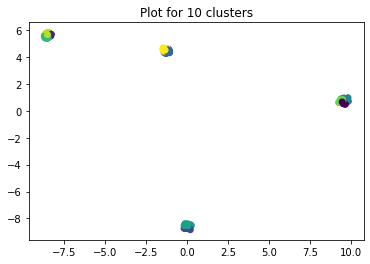

Contigency Matrix for 10 Clusters:
[[ 0 25  0  0  0  0 30  0 20  0]
 [ 0  0  0 35  0  0  0  0  0 40]
 [23  0  0  0 34  0  0 18  0  0]
 [ 0  0 28  0  0 47  0  0  0  0]]
SSE = 19.93


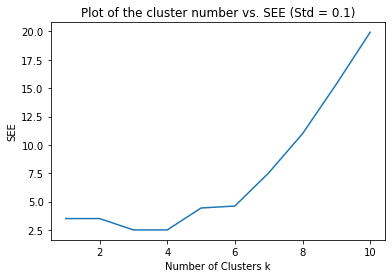

Standard Deviation = 2.5


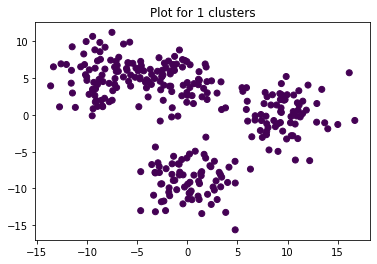

Contigency Matrix for1 Clusters:
[[75]
 [75]
 [75]
 [75]]
SSE = 3.5


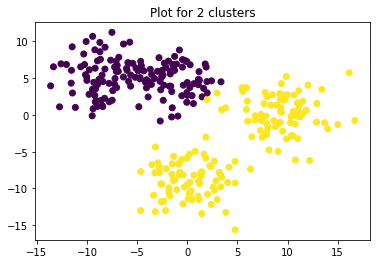

Contigency Matrix for2 Clusters:
[[75  0]
 [72  3]
 [ 0 75]
 [ 0 75]]
SSE = 1.49


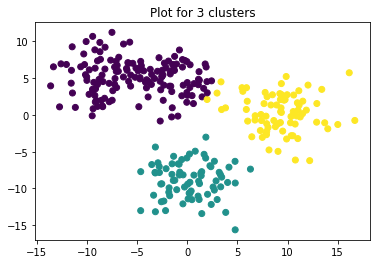

Contigency Matrix for3 Clusters:
[[75  0  0]
 [71  0  4]
 [ 0  1 74]
 [ 0 75  0]]
SSE = 1.2533333333333334


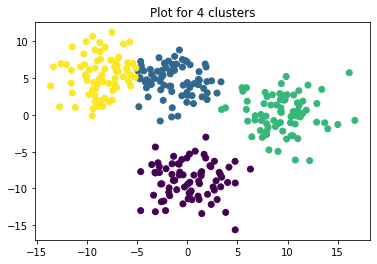

Contigency Matrix for4 Clusters:
[[ 0  9  0 66]
 [ 0 66  1  8]
 [ 1  0 74  0]
 [75  0  0  0]]
SSE = 4.383333333333334


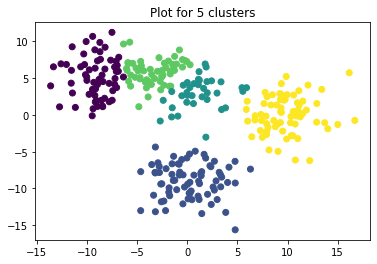

Contigency Matrix for5 Clusters:
[[61  0  0 14  0]
 [ 1  0 31 43  0]
 [ 0  0  5  0 70]
 [ 0 75  0  0  0]]
SSE = 3.033333333333333


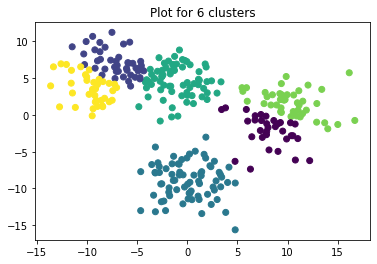

Contigency Matrix for6 Clusters:
[[ 0 33  0  4  0 38]
 [ 1 11  0 63  0  0]
 [31  0  1  0 43  0]
 [ 2  0 73  0  0  0]]
SSE = 5.53


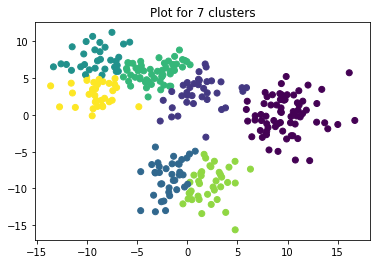

Contigency Matrix for7 Clusters:
[[ 0  0  0 29 14  0 32]
 [ 0 31  0  2 41  0  1]
 [70  5  0  0  0  0  0]
 [ 0  0 37  0  0 38  0]]
SSE = 8.376666666666667


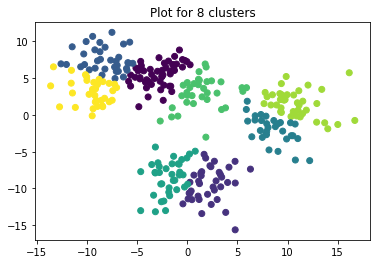

Contigency Matrix for8 Clusters:
[[10  0 31  0  0  0  0 34]
 [42  0  4  0  0 29  0  0]
 [ 0  0  0 31  0  5 39  0]
 [ 0 38  0  0 37  0  0  0]]
SSE = 10.63


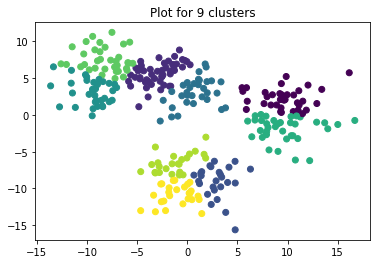

Contigency Matrix for9 Clusters:
[[ 0 10  0  0 34  0 31  0  0]
 [ 0 40  0 31  0  0  4  0  0]
 [36  0  0  1  0 37  0  1  0]
 [ 0  0 26  0  0  0  0 23 26]]
SSE = 11.47


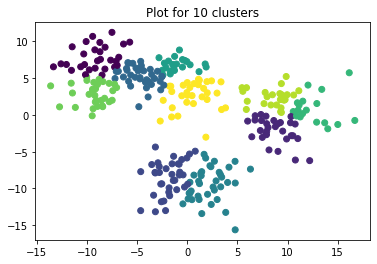

Contigency Matrix for10 Clusters:
[[27  0  0 16  0  1  0 31  0  0]
 [ 2  0  0 22  0 21  0  0  0 30]
 [ 0 30  0  0  0  0 18  0 25  2]
 [ 0  0 37  0 38  0  0  0  0  0]]
SSE = 18.083333333333332


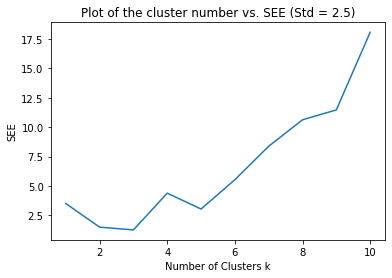

In [42]:
X2,y2 = make_blobs(n_samples=300, centers=4, n_features=2, random_state=7, cluster_std=0.1, center_box=(-10.0, 10.0))
X3,y3 = make_blobs(n_samples=300, centers=4, n_features=2, random_state=7, cluster_std=2.5, center_box=(-10.0, 10.0))


print('Standard Deviation = 0.1')
k = [1,2,3,4,5,6,7,8,9,10]
SEE_all = []
for i in k:
    y_pred = KMeans(n_clusters = i).fit_predict(X2)
    plt.scatter(X2[:,0],X2[:,1],c=y_pred)
    plt.title('Plot for ' +str(i)+ ' clusters')
    plt.show()
    print('Contigency Matrix for '+str(i)+' Clusters:')    
    print(contingency_matrix(y2,y_pred)) 
    SEE = mean_squared_error(y2,y_pred)
    SEE_all.append(SEE)
    print('SSE = '+str(SEE)) 
plt.plot(k,SEE_all)
plt.title('Plot of the cluster number vs. SEE (Std = 0.1)')
plt.xlabel('Number of Clusters k')
plt.ylabel('SEE')
plt.show()


print('Standard Deviation = 2.5')
k = [1,2,3,4,5,6,7,8,9,10]
SEE_all = []
for i in k:
    y_pred = KMeans(n_clusters = i).fit_predict(X3)
    plt.scatter(X3[:,0],X3[:,1],c=y_pred)
    plt.title('Plot for ' +str(i)+ ' clusters')
    plt.show()
    print('Contigency Matrix for'+str(i)+' Clusters:')
    print(contingency_matrix(y3,y_pred)) 
    SEE = mean_squared_error(y3,y_pred) 
    SEE_all.append(SEE)
    print('SSE = '+str(SEE)) 
plt.plot(k,SEE_all)
plt.title('Plot of the cluster number vs. SEE (Std = 2.5)')
plt.xlabel('Number of Clusters k')
plt.ylabel('SEE')
plt.show()


When setting the standard deviatin to 0.1 we have that SSE is lowest for k=4 which is expected. However this minimum occurs at k = 3 for std=2.5 but this can be expected with larger variance of clusters

## (e)

Standard Deviation = 0.1


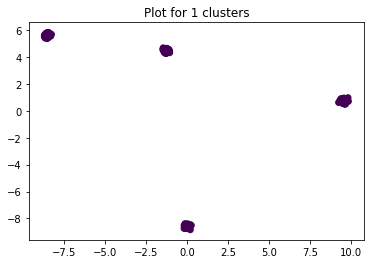

Contigency Matrix for 1 Clusters:
[[75]
 [75]
 [75]
 [75]]
SSE = 3.5


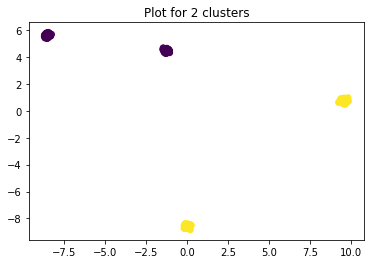

Contigency Matrix for 2 Clusters:
[[75  0]
 [75  0]
 [ 0 75]
 [ 0 75]]
SSE = 1.5


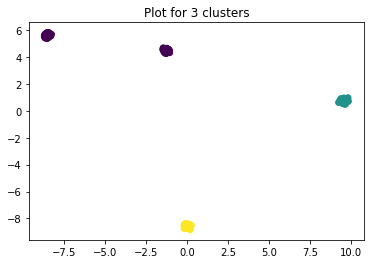

Contigency Matrix for 3 Clusters:
[[75  0  0]
 [75  0  0]
 [ 0 75  0]
 [ 0  0 75]]
SSE = 0.75


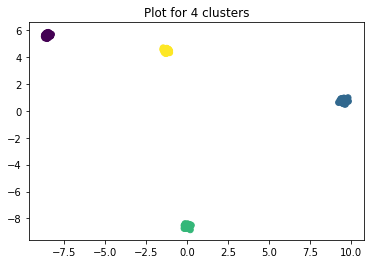

Contigency Matrix for 4 Clusters:
[[75  0  0  0]
 [ 0  0  0 75]
 [ 0 75  0  0]
 [ 0  0 75  0]]
SSE = 1.5


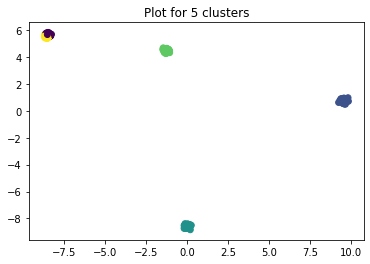

Contigency Matrix for 5 Clusters:
[[35  0  0  0 40]
 [ 0  0  0 75  0]
 [ 0 75  0  0  0]
 [ 0  0 75  0  0]]
SSE = 3.6333333333333333


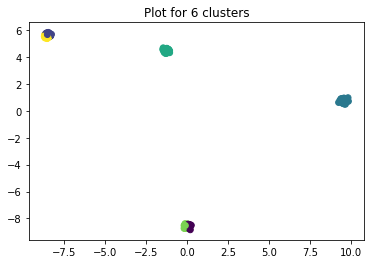

Contigency Matrix for 6 Clusters:
[[ 0 35  0  0  0 40]
 [ 0  0  0 75  0  0]
 [ 0  0 75  0  0  0]
 [31  0  0  0 44  0]]
SSE = 5.526666666666666


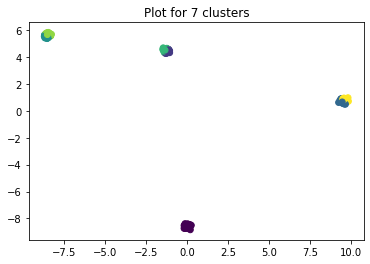

Contigency Matrix for 7 Clusters:
[[ 0  0  0 40  0 35  0]
 [ 0 31  0  0 44  0  0]
 [ 0  0 40  0  0  0 35]
 [75  0  0  0  0  0  0]]
SSE = 9.553333333333333


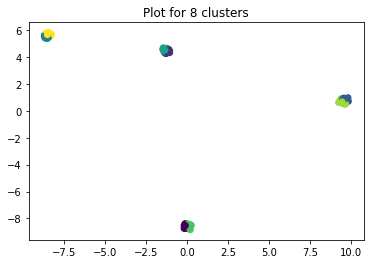

Contigency Matrix for 8 Clusters:
[[ 0  0  0 38  0  0  0 37]
 [ 0 31  0  0 44  0  0  0]
 [ 0  0 39  0  0  0 36  0]
 [42  0  0  0  0 33  0  0]]
SSE = 12.123333333333333


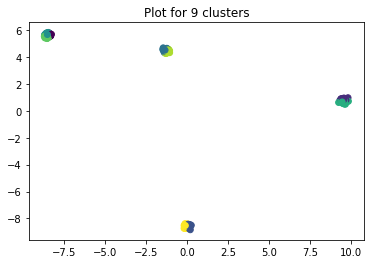

Contigency Matrix for 9 Clusters:
[[21  0  0  0 24  0 30  0  0]
 [ 0  0  0 44  0  0  0 31  0]
 [ 0 38  0  0  0 37  0  0  0]
 [ 0  0 39  0  0  0  0  0 36]]
SSE = 13.553333333333333


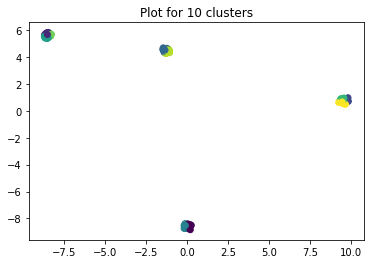

Contigency Matrix for 10 Clusters:
[[ 0 20  0  0  0 30  0 25  0  0]
 [ 0  0  0 44  0  0  0  0 31  0]
 [ 0  0 20  0  0  0 28  0  0 27]
 [32  0  0  0 43  0  0  0  0  0]]
SSE = 19.30666666666667


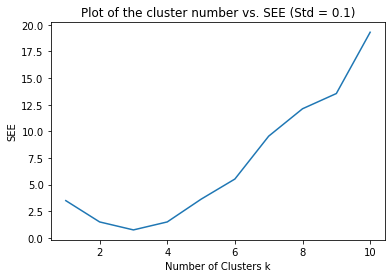

Standard Deviation = 2.5


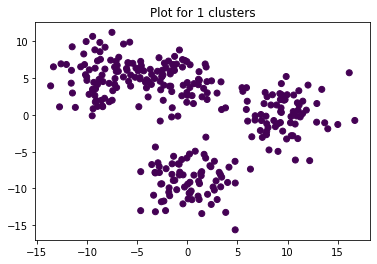

Contigency Matrix for1 Clusters:
[[75]
 [75]
 [75]
 [75]]
SSE = 3.5


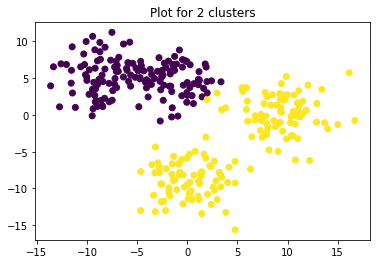

Contigency Matrix for2 Clusters:
[[75  0]
 [72  3]
 [ 0 75]
 [ 0 75]]
SSE = 1.49


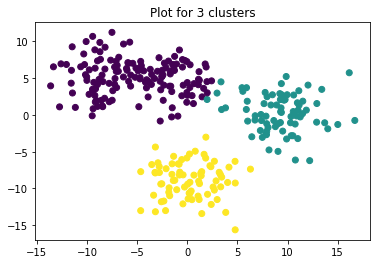

Contigency Matrix for3 Clusters:
[[75  0  0]
 [71  4  0]
 [ 0 74  1]
 [ 0  0 75]]
SSE = 0.7333333333333333


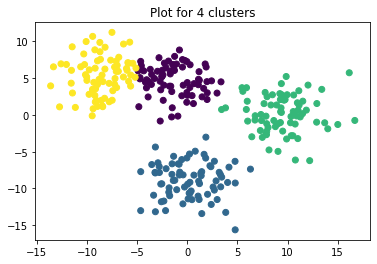

Contigency Matrix for4 Clusters:
[[ 9  0  0 66]
 [66  0  1  8]
 [ 0  1 74  0]
 [ 0 75  0  0]]
SSE = 3.3133333333333335


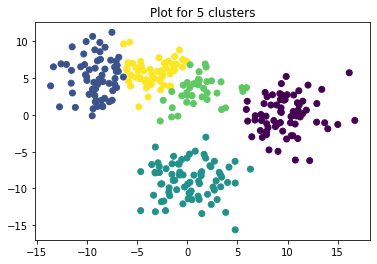

Contigency Matrix for5 Clusters:
[[ 0 61  0  0 14]
 [ 0  1  0 32 42]
 [70  0  1  4  0]
 [ 0  0 75  0  0]]
SSE = 3.8333333333333335


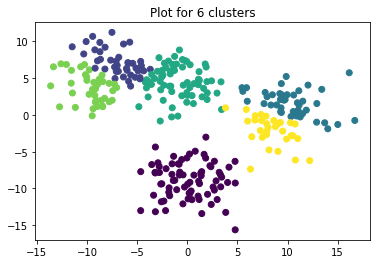

Contigency Matrix for6 Clusters:
[[ 0 32  0  3 40  0]
 [ 0 11  0 64  0  0]
 [ 1  0 43  0  0 31]
 [74  0  0  0  0  1]]
SSE = 6.36


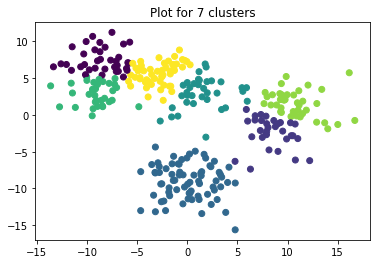

Contigency Matrix for7 Clusters:
[[33  0  0  0 32  0 10]
 [ 3  0  0 29  1  0 42]
 [ 0 30  0  6  0 39  0]
 [ 0  2 73  0  0  0  0]]
SSE = 8.393333333333333


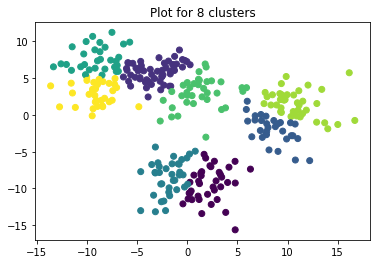

Contigency Matrix for8 Clusters:
[[ 0 14  0  0 29  0  0 32]
 [ 0 41  0  0  2 31  0  1]
 [ 0  0 31  0  0  5 39  0]
 [38  0  0 37  0  0  0  0]]
SSE = 12.023333333333333


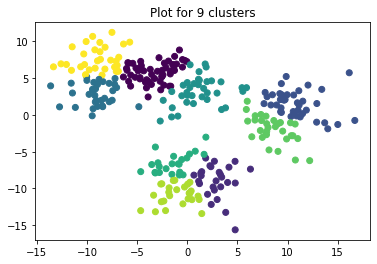

Contigency Matrix for9 Clusters:
[[14  0  0 32  0  0  0  0 29]
 [40  0  0  1 32  0  0  0  2]
 [ 0  0 39  0  4  1 31  0  0]
 [ 0 27  0  0  0 22  0 26  0]]
SSE = 12.356666666666667


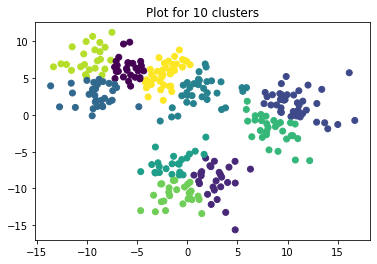

Contigency Matrix for10 Clusters:
[[17  0  0 30  0  0  0  0 24  4]
 [11  0  0  1 29  0  0  0  0 34]
 [ 0  0 39  0  4  1 31  0  0  0]
 [ 0 27  0  0  0 22  0 26  0  0]]
SSE = 19.05


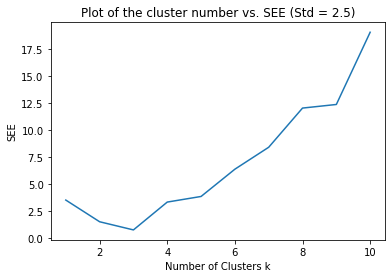

In [45]:
print('Standard Deviation = 0.1')
k = [1,2,3,4,5,6,7,8,9,10]
SEE_all = []
for i in k:
    y_pred = KMeans(n_clusters = i, random_state=20).fit_predict(X2)
    plt.scatter(X2[:,0],X2[:,1],c=y_pred)
    plt.title('Plot for ' +str(i)+ ' clusters')
    plt.show()
    print('Contigency Matrix for '+str(i)+' Clusters:')    
    print(contingency_matrix(y2,y_pred)) 
    SEE = mean_squared_error(y2,y_pred)
    SEE_all.append(SEE)
    print('SSE = '+str(SEE)) 
plt.plot(k,SEE_all)
plt.title('Plot of the cluster number vs. SEE (Std = 0.1)')
plt.xlabel('Number of Clusters k')
plt.ylabel('SEE')
plt.show()


print('Standard Deviation = 2.5')
k = [1,2,3,4,5,6,7,8,9,10]
SEE_all = []
for i in k:
    y_pred = KMeans(n_clusters = i, random_state=20).fit_predict(X3)
    plt.scatter(X3[:,0],X3[:,1],c=y_pred)
    plt.title('Plot for ' +str(i)+ ' clusters')
    plt.show()
    print('Contigency Matrix for'+str(i)+' Clusters:')
    print(contingency_matrix(y3,y_pred)) 
    SEE = mean_squared_error(y3,y_pred) 
    SEE_all.append(SEE)
    print('SSE = '+str(SEE)) 
plt.plot(k,SEE_all)
plt.title('Plot of the cluster number vs. SEE (Std = 2.5)')
plt.xlabel('Number of Clusters k')
plt.ylabel('SEE')
plt.show()





As K-means is not deterministic, when random state is set to 'none', different clustering patterns will emerge as a result of different starting/ending points. This is because for datasets with a reasonably high number of samples, the results of kmeans clustering can be unstable ie. different iterations have different pathways. 

Other than selecting random state perhaps setting more stringent parameters in the kmeans algorithim in terms of the way it searches for clusters may yield more consistent results.

## Assignment 2 (a)

In [7]:
X = pd.read_csv('vertebrate.csv',header='infer')
print(X)

             Name  Warm-blooded  Gives Birth  Aquatic Creature  \
0           human             1            1                 0   
1          python             0            0                 0   
2          salmon             0            0                 1   
3           whale             1            1                 1   
4            frog             0            0                 1   
5          komodo             0            0                 0   
6             bat             1            1                 0   
7          pigeon             1            0                 0   
8             cat             1            1                 0   
9   leopard shark             0            1                 1   
10         turtle             0            0                 1   
11        penguin             1            0                 1   
12      porcupine             1            1                 0   
13            eel             0            0                 1   
14     sal

## (b)

### Single Link

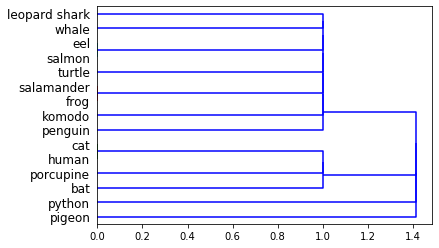

In [8]:
names = X['Name']
y = X['Class']
X = X.drop(['Name','Class'],axis=1)
Z = linkage(X.as_matrix(), 'single')
dn = dendrogram(Z,labels=names.tolist(),orientation='right') 

### Max Link

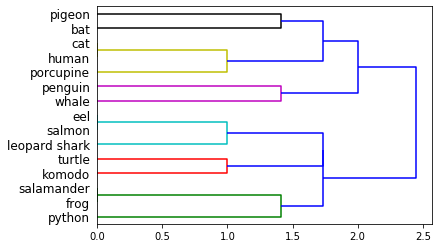

In [9]:
Z = linkage(X.as_matrix(), 'complete')
dn = dendrogram(Z,labels=names.tolist(),orientation='right')

Average Link

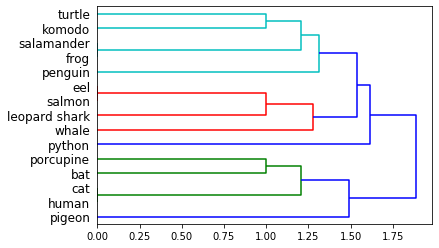

In [10]:
Z = linkage(X.as_matrix(), 'average')
dn = dendrogram(Z,labels=names.tolist(),orientation='right')

I consider that the best clustering representation of this data occurs using average link hierarchical clustering of the data. There is two main branches of water based and non water based creatures, with the Python receiving its own branch, connected with the rest of the water creatures as it can live in water. It also seems to do the best job at grouping together creatures of specific classes. 

Single Link displays quite basic connection of the samples while Max Link perhaps tries t make too many conncections between individual animals.

## Assignment 3 (a)

In [11]:
df = pd.read_csv('chameleon.csv')
print(df.head())
x = df['x']
y = df['y']

         x        y
0  650.914  214.888
1   41.767  179.408
2  509.126  233.749
3  486.403  152.427
4   46.883  367.904


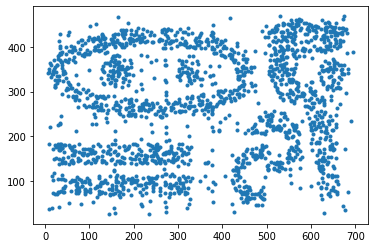

In [12]:
plt.plot(x,y,'.')

## (b)

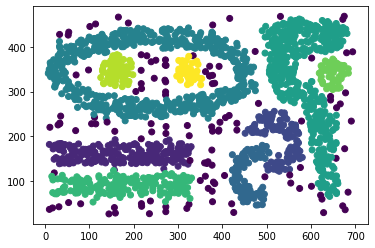

In [13]:
db = DBSCAN(eps=15.5, min_samples=5).fit_predict(df)
plt.scatter(x,y,c=db)

## (c)

In [46]:
eps = np.arange(0.1,20,0.5)
min_samples = np.arange(1,20,2)
for i in eps:
    for k in min_samples:
        db = DBSCAN(eps=i, min_samples=k).fit_predict(df)
        #plt.scatter(x,y,c=db,label=i)
        #plt.title('Plot for eps = ' +str(i)+ ' and for min samples = ' +str(k))
        #plt.show()
    

We have that the 'eps' is defined as the maximum distance between two samples for one to be considered as in the neighborhood of the other, while min_samples defines the number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

For small eps we get small, localized clusters, given that the min samples does not greatly exceed eps for a dense dataset like this. Where min samples exceeds the eps greatly, dbscan is not effective in differentiating between clusters as there is a small distance between a given core point and the outermost point of the cluster, while a great number of points is required to define the cluster. 

For this dataset (one with many different clusters and high density instances) it is observed that the best clustering results are achieved for a high eps (between 15.1 and 16.1) with a min number of samples at approx. 5-7. This is because the eps takes into account the potentially large cluster sizes, while the min sample at 9 is optimal. 